In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [38]:
df = yf.download('000300.SS', start="2021-03-15", end="2023-08-15")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,5035.540039,204200
2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,5079.359863,161400
2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,5100.859863,149200
2021-03-18,5114.589844,5160.459961,5111.129883,5141.770020,5141.770020,142900
2021-03-19,5068.529785,5089.919922,4980.759766,5007.089844,5007.089844,164200
...,...,...,...,...,...,...
2023-08-08,3980.040039,4002.290039,3963.459961,3979.729980,3979.729980,109900
2023-08-09,3967.360107,3982.110107,3961.840088,3967.570068,3967.570068,94600
2023-08-10,3962.860107,3976.459961,3945.389893,3975.719971,3975.719971,97200


In [39]:
df['pct'] = df['Close']/df['Close'].shift(1) -1.0
df = df.dropna().reset_index(drop = False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,pct
0,2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,5079.359863,161400,0.008702
1,2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,5100.859863,149200,0.004233
2,2021-03-18,5114.589844,5160.459961,5111.129883,5141.770020,5141.770020,142900,0.008020
3,2021-03-19,5068.529785,5089.919922,4980.759766,5007.089844,5007.089844,164200,-0.026193
4,2021-03-22,5008.399902,5071.339844,4996.540039,5057.149902,5057.149902,167400,0.009998
...,...,...,...,...,...,...,...,...
583,2023-08-08,3980.040039,4002.290039,3963.459961,3979.729980,3979.729980,109900,-0.002611
584,2023-08-09,3967.360107,3982.110107,3961.840088,3967.570068,3967.570068,94600,-0.003055
585,2023-08-10,3962.860107,3976.459961,3945.389893,3975.719971,3975.719971,97200,0.002054
586,2023-08-11,3977.979980,3977.979980,3884.250000,3884.250000,3884.250000,126100,-0.023007


In [40]:
np.random.seed(0)

x: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
x_noise: [ 2.76405235  2.40015721  3.97873798  6.2408932   6.86755799  5.02272212
  7.95008842  7.84864279  8.89678115 10.4105985  11.14404357 13.45427351
 13.76103773 14.12167502 15.44386323 16.33367433 18.49407907 17.79484174]
y: [ 6.52810469  5.80031442  8.95747597 13.4817864  14.73511598 11.04544424
 16.90017684 16.69728558 18.7935623  21.821197   23.28808714 27.90854701
 28.52207545 29.24335003 31.88772647 33.66734865 37.98815815 36.58968347]


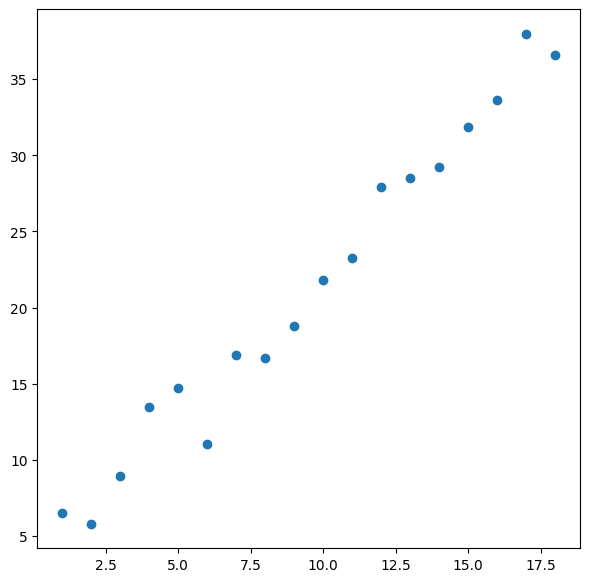

In [41]:
N = 18
x = np.arange(1, N+1)
x_noise = x + np.random.randn(N)
y = 2* x_noise + 1
print ('x:', x)
print ('x_noise:', x_noise)
print ('y:', y)
plt.figure(figsize = (7,7))
plt.scatter(x, y)
plt.show()

Slope 1.9074412756437675 Intercept 3.2046100921134837


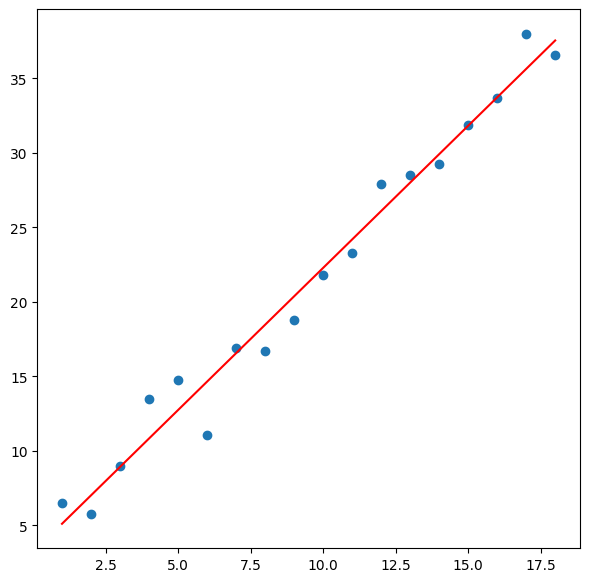

In [42]:
lr = LinearRegression().fit(x.reshape(-1,1),y)
y_pred = lr.predict(x.reshape(-1, 1))
beta = lr.coef_[0]
alpha = lr.intercept_

print('Slope',beta, 'Intercept',alpha)
plt.figure(figsize = (7,7))
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'red')
plt.show()

In [43]:
def calculate_beta(df, window = 18):
    if df.shape[0] < window:
        return np.nan
    x = df['Low'].values
    y = df['High'].values
    beta = LinearRegression().fit(x.reshape(-1, 1), y).coef_[0]
    return beta

N = 18
df['beta'] = [calculate_beta(i,window=N) for i in df.rolling(N)]

df

,Date,Open,High,Low,Close,Adj Close,Volume,pct,beta
0,2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,5079.359863,161400,0.008702,NaN
1,2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,5100.859863,149200,0.004233,NaN
2,2021-03-18,5114.589844,5160.459961,5111.129883,5141.770020,5141.770020,142900,0.008020,NaN
3,2021-03-19,5068.529785,5089.919922,4980.759766,5007.089844,5007.089844,164200,-0.026193,NaN
4,2021-03-22,5008.399902,5071.339844,4996.540039,5057.149902,5057.149902,167400,0.009998,NaN
...,...,...,...,...,...,...,...,...,...
583,2023-08-08,3980.040039,4002.290039,3963.459961,3979.729980,3979.729980,109900,-0.002611,1.044752
584,2023-08-09,3967.360107,3982.110107,3961.840088,3967.570068,3967.570068,94600,-0.003055,1.024818
585,2023-08-10,3962.860107,3976.459961,3945.389893,3975.719971,3975.719971,97200,0.002054,1.011209
586,2023-08-11,3977.979980,3977.979980,3884.250000,3884.250000,3884.250000,126100,-0.023007,0.979245


均值：0.882
标准差：0.123
偏度：-0.727
峰度：0.866


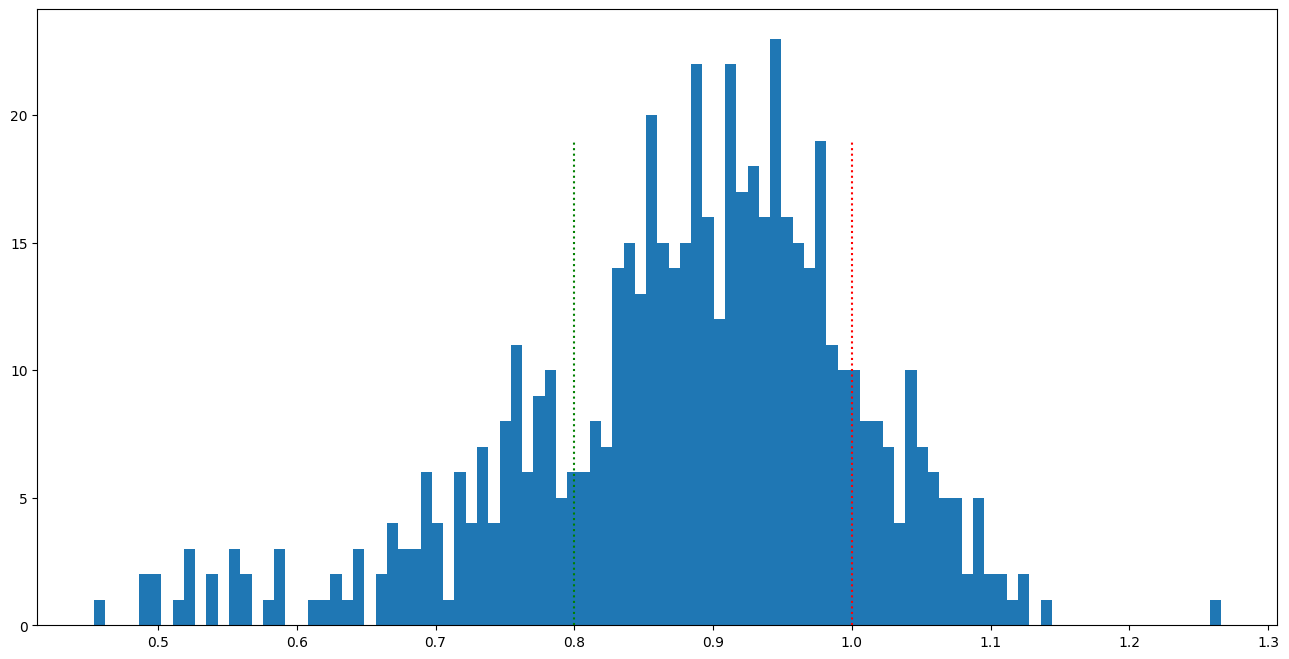

In [44]:
print('均值：%.3f' %df['beta'].mean())
print('标准差：%.3f' %df['beta'].std())
print('偏度：%.3f' %df['beta'].skew())
print('峰度：%.3f' %df['beta'].kurt())

y = list(range(20))
plt.figure(figsize=(16,8))
plt.hist(df['beta'], bins=100)
plt.plot(len(y)*[0.8], y, color='green', linestyle=':')
plt.plot(len(y)*[1.0], y, color='red', linestyle=':')
plt.show()


RSRS斜率量化择时策略的年化收益率：-10.52%


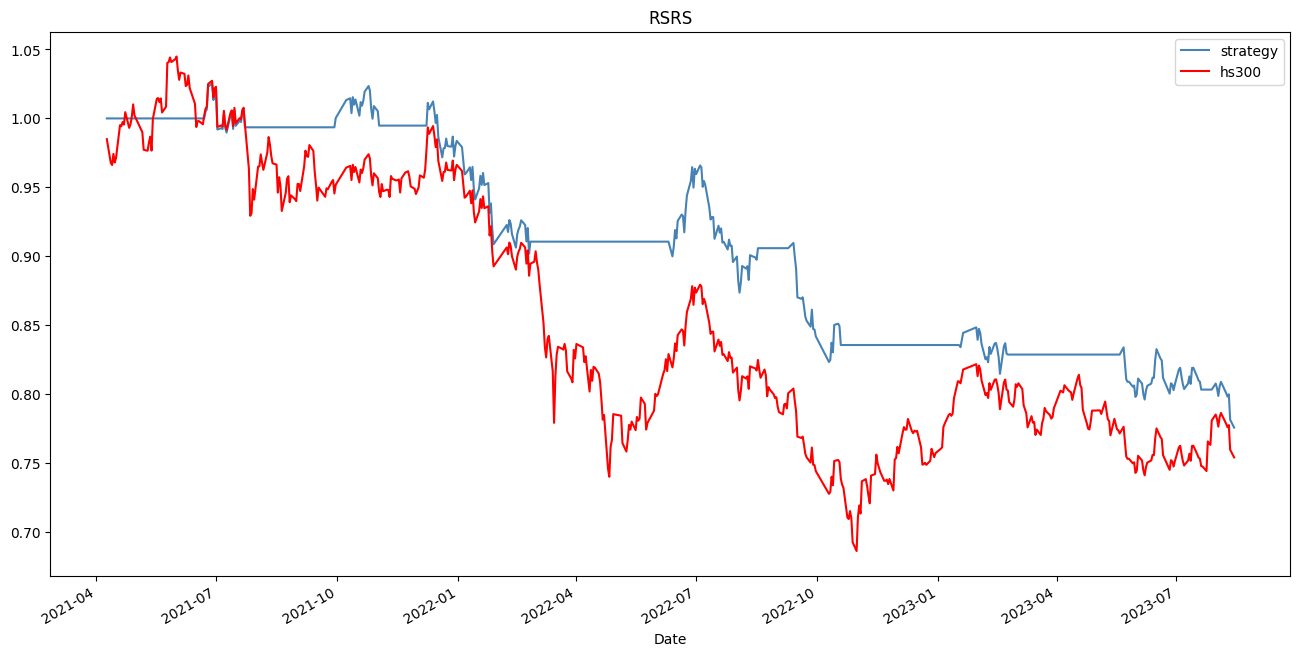

In [45]:
buy_thre = 1.0
sell_thre = 0.8
data1 = df.dropna().copy().reset_index(drop = True)

data1['flag'] = 0
data1['position'] = 0
position = 0


for i in range(1, data1.shape[0] - 1):
    beta = data1.loc[i,'beta']
    if(position == 0) and (beta > buy_thre):
        # above thre, buy the stock, change pos to 1
        data1.loc[i, 'flag'] = 1
        data1.loc[i+1, 'position'] = 1
        position = 1
    elif (position == 1) and (beta < sell_thre):
        # below thre, sell the stock, change pos to 0
        data1.loc[i, 'flag'] = -1
        data1.loc[i+1, 'position'] = 0
        position = 0
    else:
        data1.loc[i+1, 'position'] = data1.loc[i, 'position']

# RSRS daily return rate
data1['strategy_pct'] = data1['pct'] * data1['position']

# Strategy return and hs300 return
data1['strategy'] = (1.0 + data1['strategy_pct']).cumprod()
data1['hs300'] = (1.0 + data1['pct']).cumprod()

# annual return
annual_return1 = 100 * (pow(data1['strategy'].iloc[-1], 250/data1.shape[0]) - 1.0)
print('RSRS斜率量化择时策略的年化收益率：%.2f%%'%annual_return1)

#将索引从字符串转换为日期格式，方便展示
data1.index = pd.to_datetime(data1['Date'])
ax = data1[['strategy','hs300']].plot(figsize=(16,8), color=['SteelBlue','Red'],title='RSRS')
plt.show()


RSRS斜率量化择时策略的年化收益率：-9.24%


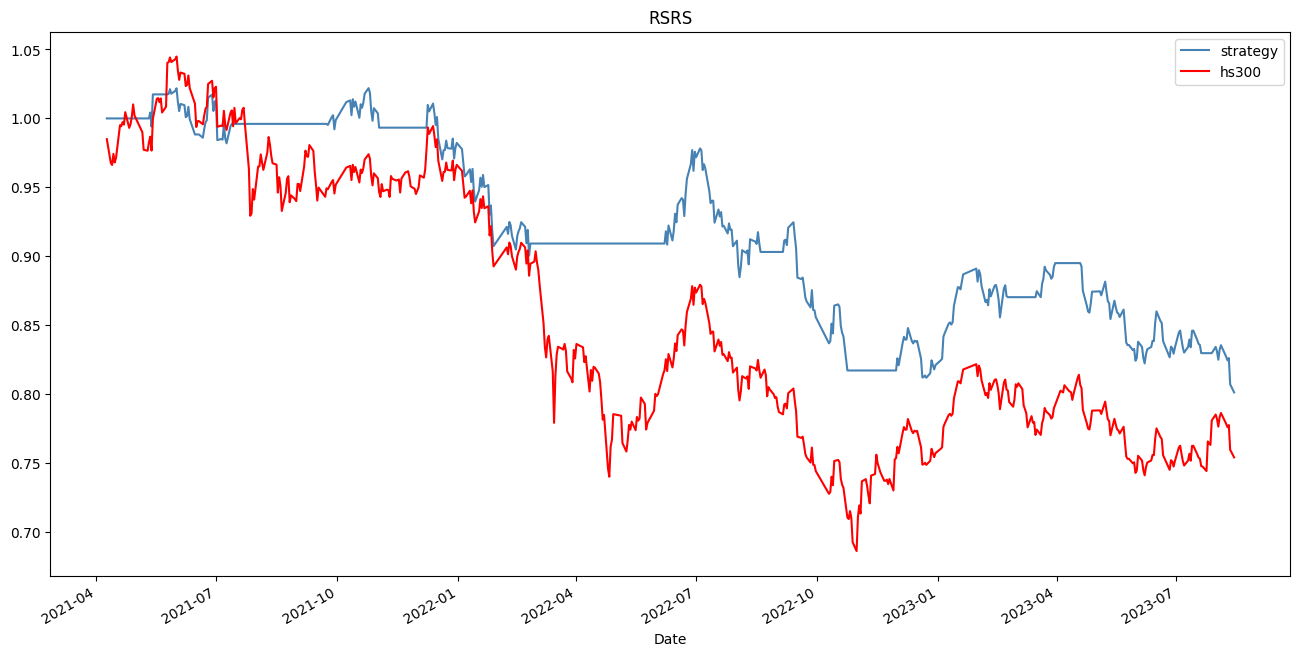

In [46]:
M = 600
buy_thre = 0.7
sell_thre = -0.7

data2 = df.dropna().copy().reset_index(drop = True)
data2['std_score'] = (data2['beta'] - data2['beta'].rolling(M, min_periods = 20).mean())/(data2['beta'].rolling(M, min_periods = 20).std())

data2['flag'] = 0
data2['position'] = 0
position = 0

for i in range(1, data2.shape[0] - 1):
    std_score = data2.loc[i,'std_score']
    if (position == 0) and (std_score > buy_thre):
        data2.loc[i,'flag'] = 1
        data2.loc[i+1, 'position'] = 1
        position = 1
    elif (position == 1) and (std_score < sell_thre):
        data2.loc[i,'flage'] = -1
        data2.loc[i+1, 'position'] = 0
        position = 0
    else:
        data2.loc[i+1, 'position'] = data2.loc[i, 'position']
    

data2['strategy_pct'] = data2['pct'] * data2['position']

data2['strategy'] = (1.0 + data2['strategy_pct']).cumprod()
data2['hs300'] = (1.0 + data2['pct']).cumprod()

annual_return2 = 100*(pow(data2['strategy'].iloc[-1], 250/data2.shape[0])-1.0)
print('RSRS斜率量化择时策略的年化收益率：%.2f%%'%annual_return2)

#将索引从字符串转换为日期格式，方便展示
data2.index = pd.to_datetime(data2['Date'])
ax = data2[['strategy','hs300']].plot(figsize=(16,8), color=['SteelBlue','Red'],title='RSRS')
plt.show()


RSRS斜率量化择时策略的年化收益率 RSRS slope strategy：-10.52%
RSRS斜率量化择时策略的年化收益率 RSRS std strategy：-9.24%


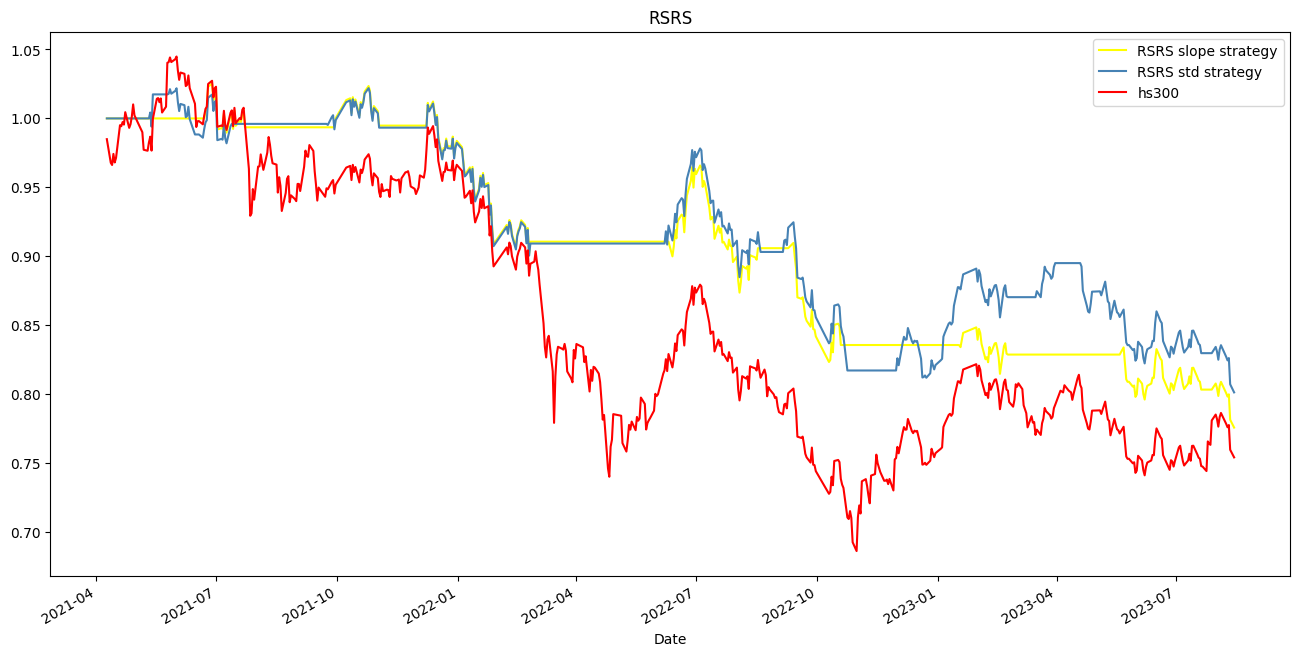

In [47]:
print('RSRS斜率量化择时策略的年化收益率 RSRS slope strategy：%.2f%%'%annual_return1)
print('RSRS斜率量化择时策略的年化收益率 RSRS std strategy：%.2f%%'%annual_return2)

data_merge = pd.merge(data1[['Date','strategy']].rename(columns={'strategy':'RSRS slope strategy'}),
                      data2[['strategy','hs300']].rename(columns={'strategy':'RSRS std strategy'}),
                      left_index=True, right_index=True, how='inner')
data_merge.index = pd.to_datetime(data_merge['Date'])
ax = data_merge[['RSRS slope strategy','RSRS std strategy','hs300']].plot(figsize=(16,8), 
                color=['Yellow','SteelBlue','Red'], title='RSRS')
plt.show()
